In [120]:
from math import log, exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial

rcParams = {'font.size': 24 , 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}

plt.rcParams.update(rcParams)

def log_fac(n):
    return np.log(np.arange(2, n+1)).sum()
 
def log_binomial(n,k): 
    return (log_fac(n)-log_fac(k)-log_fac(n-k))

def Return_Actual_Prob(N, k, n):
    n1 = log_binomial(N-k, n-1)
    n2 = log_binomial(N, n)
    n3 = log_binomial(N-k, n)
    term_1 = exp(n1-n2)*k
    term_2 = exp(n3-n2)
    return term_1+term_2
    
def Return_Singleton_Prob(N, n, k):
    n1 = log_binomial(N-k, n-k)
    n2 = log_binomial(N, n)
    return exp(n1-n2)

def Return_Approximate_Prob(N, k, n, m):
    return exp(-k*n/N)*(1+(k*n/N)*exp(k*m/N))

In [199]:
N = 1773145
alpha = [0.1,0.5,1,5,10]
df = pd.DataFrame()
df_m = pd.DataFrame()
ep = 0.99999
for i in range(len(alpha)):
    actual, approximate = [], []
    s = int(alpha[i]*N/100.0)
    print(s)
    m = []
    for k in list(range(50,1000,1))+list(range(1000, 50000, 500)):
        b = Return_Approximate_Prob(N, k, s, 1)
        #a = Return_Actual_Prob(N, k, s)
        approximate.append(b)
        #actual.append(a)
        if b>0 and b<1:
            m.append((1-ep)/b)
        else:
            m.append(0)
    df[str(s)+'_Approximate'] = approximate
    #df[str(s)+'_Actual'] = actual
    df_m[str(s)+'_Cluster_Size'] = m
df['Cluster_Size'] = np.array(list(range(50,1000,1))+list(range(1000, 50000, 500)))/N*100.0


1773
8865
17731
88657
177314


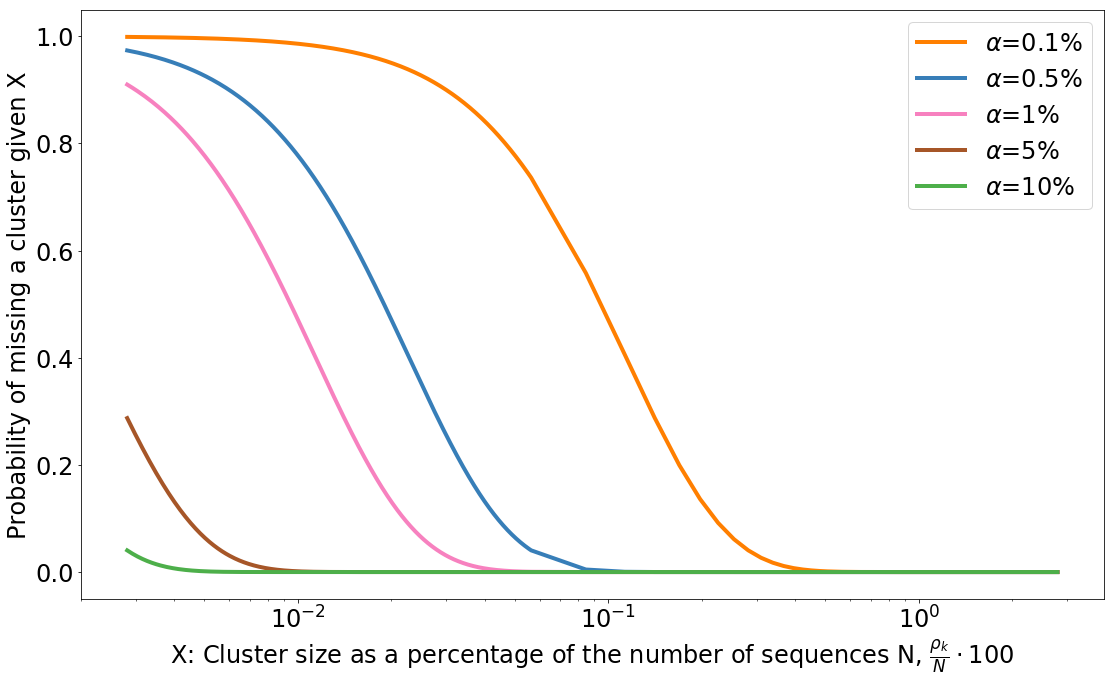

In [202]:
plt.rcParams.update(rcParams)
fig, ax = plt.subplots(1,1,figsize = (16,10))
colors = ['#ff7f00','#377eb8','#f781bf', '#a65628', '#4daf4a']
for i in range(len(alpha)):
    s = int(alpha[i]*N/100.0)
    df.plot('Cluster_Size', str(s)+'_Approximate', linewidth=4, color = colors[i], 
            ax = ax,label = r'$\alpha$='+str(alpha[i])+'%')
ax.legend()
ax.set_xlabel(r'X: Cluster size as a percentage of the number of sequences N, $\frac{\rho_k}{N}\cdot 100$')
ax.set_ylabel('Probability of missing a cluster given X')
ax.set_xscale('log')
fig.tight_layout()

fig.savefig('../../Plots/Iterative_Clustering/Probability_Missing_Cluster.pdf')

In [214]:
N = 1773145
alpha = [0.1]#,0.5,1,5,10]
m = np.arange(10, 50000,10)

df = pd.DataFrame()

ep = 0.99999
for i in range(len(alpha)):
    s = int(alpha[i]*N/100.0)
    print(s)
    for k in [10, 50, 100, 1000, 10000, 40000]:
        approximate = []
        for j in m:
            if(j*k<N):
                b = Return_Approximate_Prob(N, k, s, 1)
                if(b>1):
                    b=1
                approximate.append(b**j)
            else:
                approximate.append(np.nan)
        df[r'$\frac{\rho_1}{N}\cdot 100$='+str(round(k/N*100, 3))] = approximate
df['Num_Clusters'] = m

1773


In [215]:
df = df.set_index('Num_Clusters')

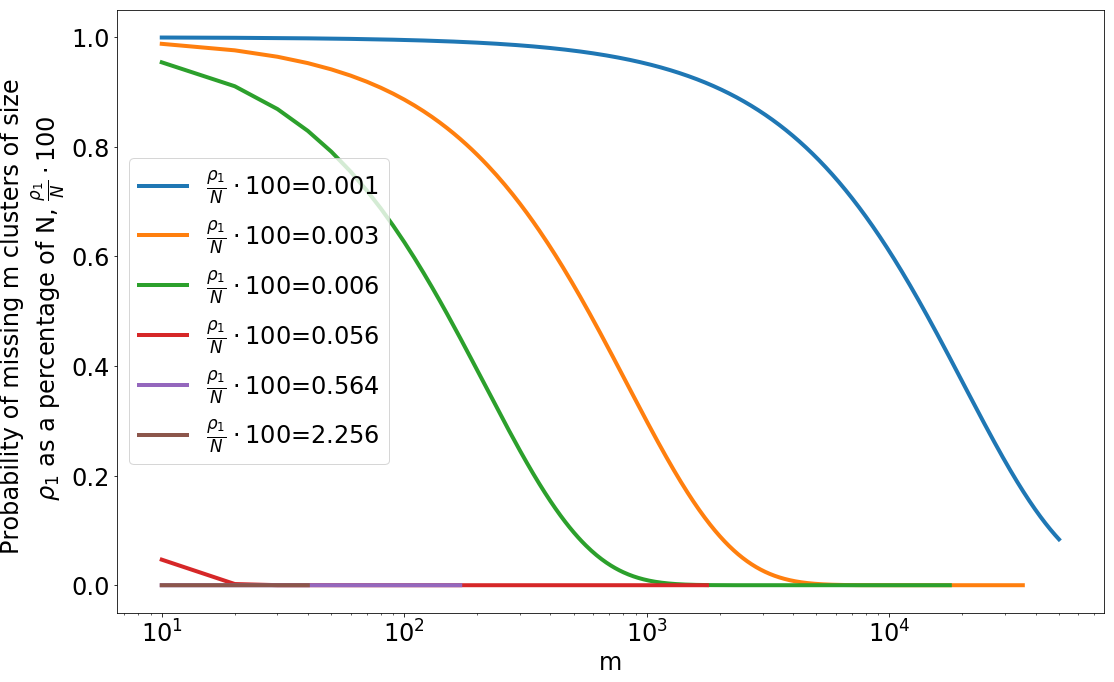

In [216]:
fig, ax = plt.subplots(1,1,figsize=(16,10))

df.plot(ax = ax, linewidth=4)
ax.set_xlabel('m')
ax.set_ylabel('Probability of missing m clusters of size \n '+r'$\rho_1$ as a percentage of N, $\frac{\rho_1}{N}\cdot 100$')
ax.set_xscale('log')
fig.tight_layout()
#ax.set_ylim([0,1])
fig.savefig('../../Plots/Iterative_Clustering/Lemma_2_Plot.pdf')